In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as skl
import matplotlib as mp
import seaborn as sn
import statistics as stats


import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## load data and data inpection

In [2]:
# load data
house_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
#data inspection
house_data.shape

(1460, 81)

There are 1460 rows and 81 columns 

In [4]:
# drop duplicates
house_data.drop_duplicates().shape[0] == house_data.shape[0]

True

There is no duplicated rows in data

In [5]:
# create target feature
target = house_data.SalePrice

# remove id and target columns

house_data1 = house_data.drop(columns=['Id'],axis = 1)

# check
house_data1.shape[1]==house_data.shape[1]-1 and\
not ['Id'] in house_data1.columns.tolist()

True

### drop Id ans SalePrice from features dataframe

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

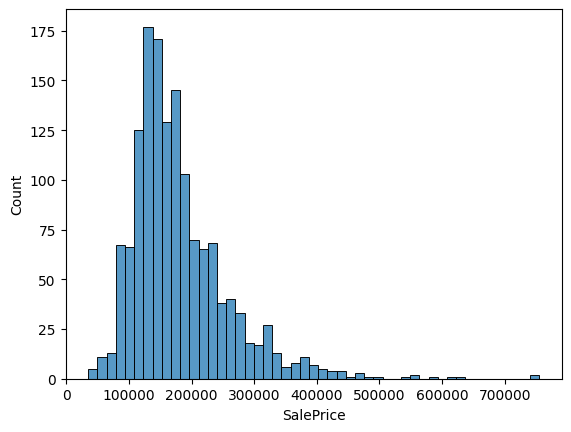

In [6]:
# plot target 
sn.histplot(target)

In [7]:
# select numeric columns
num_data = house_data1[house_data1.select_dtypes(include='number').columns]
print(f"There are {num_data.shape[1]} features in house_data1")

There are 37 features in house_data1


In [8]:
#categorical columns 
cat_data = house_data1[house_data1.select_dtypes('object').columns]
print(f"There are {cat_data.shape[1]} categorical features in cat_data")

There are 43 categorical features in cat_data


### missing values 

In [9]:
# categorical features
na_catCols = cat_data.columns[cat_data.isna().mean() !=0].tolist()
cat_data[na_catCols].isna().mean()

Alley           0.937671
MasVnrType      0.597260
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [10]:
na_catCols = cat_data.columns[cat_data.isna().mean() >= 0.3].tolist()
cat_data[na_catCols].isna().mean()

Alley          0.937671
MasVnrType     0.597260
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

These features have NA's proportion above 0.3. How to deal with that ?

In [11]:
# numerical features with na or missing values prop >=0.3
na_numCols = num_data.columns[num_data.isnull().mean()> 0.2].tolist()
num_data[na_numCols].isna().mean()

Series([], dtype: float64)

These 3 columns has NAs. How to deal with that?

In [12]:
house_data1.isna().mean().mean()

0.0670291095890411

In [13]:
# fill with mode : doesn't change anything 
for feature in house_data1.columns:
    house_data1[feature].fillna(stats.mode(house_data1[feature]))
# is not convenient : the most common values for rooms for e.g might not be the right one for 
#any house presenting missing value 


In [14]:
house_data1.isna().mean().mean()

0.0670291095890411

In [15]:
# drop columns with na prop > 0.2
house_data2 = house_data1.drop(na_catCols,axis=1)
print(f"house_data2 has shape {house_data2.shape}")

house_data2 has shape (1460, 74)


In [16]:
#drop lines with Nas 
house_data3 = house_data2.dropna()
print(f"house_data3 shape :{house_data3.shape}")

house_data3 shape :(1094, 74)


In [17]:
# missing values check
if house_data3.isna().mean().sum() == 0.0 :
    print("There is no missing value in house_data3")
else:
    print("missing values still in house_data3")

There is no missing value in house_data3


### note : we might also impute missing values  with random forest for example !

In [18]:
prop = 1 - round(house_data3.shape[0]/house_data1.shape[0],2)
print("Removed rows proportion is {}, though, we get rid of {}% of \
potential information 🤔".format(prop,prop*1e2)) 

Removed rows proportion is 0.25, though, we get rid of 25.0% of potential information 🤔


In [19]:
# delete useless df
del house_data ,house_data1, house_data2

In [20]:
# features selection 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X = house_data3
y = target
X, y = make_regression(n_features=74, 
                       n_informative=7,
                       random_state=0,
                       shuffle=False)
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, y)
#print(regr.predict([[0, 0, 0, 0]]))


RandomForestRegressor(max_depth=3, random_state=0)

In [21]:
forest_importances = pd.Series(regr.feature_importances_,index = house_data3.columns)
#fig, ax = plt.subplots()
forest_importances.sort_values(ascending= False)[:5]

MSSubClass    0.371649
MSZoning      0.154410
LotShape      0.108566
Street        0.085754
LandSlope     0.028556
dtype: float64

In [22]:
house_data4 = house_data3[forest_importances.sort_values(ascending= False).index[:6]]

<Axes: >

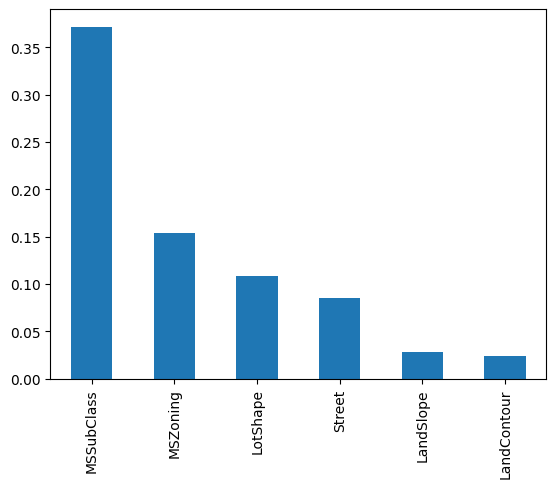

In [23]:
# plot features importance (forest importance) 
forest_importances.sort_values(ascending= False)[:6].plot.bar()

To be continued 😉...